In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data_set=pd.read_csv("matches.csv")

In [4]:
data_set.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
id                 636 non-null int64
season             636 non-null int64
city               629 non-null object
date               636 non-null object
team1              636 non-null object
team2              636 non-null object
toss_winner        636 non-null object
toss_decision      636 non-null object
result             636 non-null object
dl_applied         636 non-null int64
winner             633 non-null object
win_by_runs        636 non-null int64
win_by_wickets     636 non-null int64
player_of_match    633 non-null object
venue              636 non-null object
umpire1            635 non-null object
umpire2            635 non-null object
umpire3            0 non-null float64
dtypes: float64(1), int64(5), object(12)
memory usage: 89.6+ KB


In [6]:
data_set.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
data_set[data_set['winner'].isna()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [8]:
data_set['umpire1'].isna()

0      False
1      False
2      False
3      False
4       True
       ...  
631    False
632    False
633    False
634    False
635    False
Name: umpire1, Length: 636, dtype: bool

In [9]:
data_set[data_set["city"].isna()==True]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,2014-04-19,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,2014-04-19,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,2014-04-23,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,2014-04-25,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,2014-04-25,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,2014-04-28,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,2014-04-30,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [11]:
data=data_set["venue"].value_counts()[:7]
data

M Chinnaswamy Stadium                         66
Eden Gardens                                  61
Feroz Shah Kotla                              60
Wankhede Stadium                              57
Rajiv Gandhi International Stadium, Uppal     49
MA Chidambaram Stadium, Chepauk               48
Punjab Cricket Association Stadium, Mohali    35
Name: venue, dtype: int64

[Text(0, 0, 'M Chinnaswamy Stadium'),
 Text(0, 0, 'Eden Gardens'),
 Text(0, 0, 'Feroz Shah Kotla'),
 Text(0, 0, 'Wankhede Stadium'),
 Text(0, 0, 'Rajiv Gandhi International Stadium, Uppal'),
 Text(0, 0, 'MA Chidambaram Stadium, Chepauk'),
 Text(0, 0, 'Punjab Cricket Association Stadium, Mohali')]

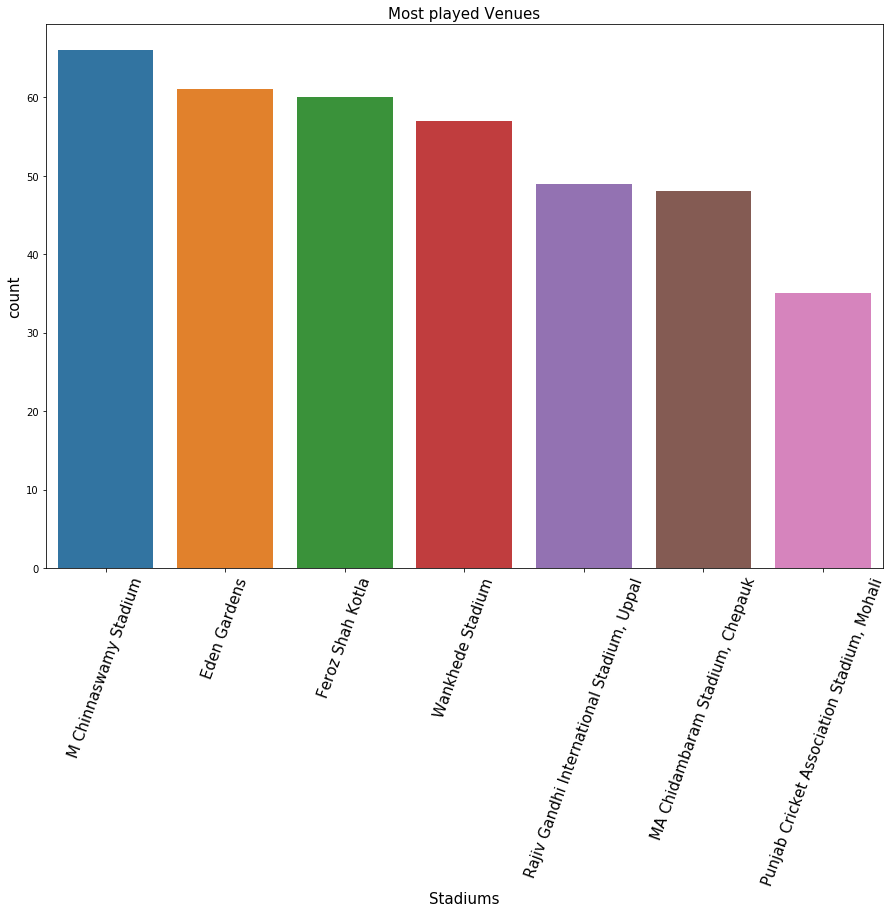

In [12]:
plt.figure(figsize=(15,10))
ab=sns.barplot(data.index,data)
plt.title("Most played Venues",fontsize=15)
plt.xlabel("Stadiums",fontsize=15)
plt.ylabel("count",fontsize=15)
#plt.gcf()
ab.set_xticklabels(rotation=70,labels=data.index,fontsize=15)

In [14]:
data=data_set[(data_set["venue"]=="Feroz Shah Kotla") & (data_set["win_by_wickets"]>0)].count()["win_by_wickets"]
data

31

In [19]:
data1=data_set[(data_set["venue"]=="Feroz Shah Kotla") & (data_set["win_by_wickets"]>=0)].count()["win_by_wickets"]
data1

60

([<matplotlib.patches.Wedge at 0x1394ee23788>,
 [Text(-0.05756949701481712, 1.0984924911047236, 'win_by_wickets'),
  Text(0.057569394166526934, -1.0984924964947642, 'win_by_runs')],
 [Text(-0.03140154382626388, 0.5991777224207583, '51.67%'),
  Text(0.03140148772719651, -0.5991777253607804, '48.33%')])

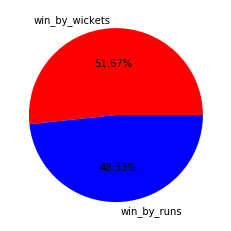

In [20]:
plt.pie([data,data1-data],colors=['r','b'],labels=["win_by_wickets","win_by_runs"],autopct="%1.02f%%")

In [112]:
delhi=data_set[data_set["venue"]=="Feroz Shah Kotla"]
delhi1=delhi[delhi.win_by_wickets>0]
delhi1=delhi1.count()[:1]
len(delhi)

60

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """Entry point for launching an IPython kernel.


([<matplotlib.patches.Wedge at 0x165ed349d08>,
 [Text(-0.05756949701481712, 1.0984924911047236, 'win_by_wickets'),
  Text(0.057569394166526934, -1.0984924964947642, 'win_by_runs')],
 [Text(-0.03140154382626388, 0.5991777224207583, '52%'),
  Text(0.03140148772719651, -0.5991777253607804, '48%')])

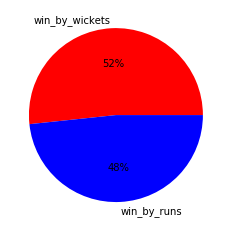

In [113]:
plt.pie([delhi1,len(delhi)-delhi1],colors=['r','b'],autopct="%1.0f%%",labels=["win_by_wickets","win_by_runs"])

In [117]:
 data_set[data_set["winner"]==data_set["toss_winner"]].count()[:1]

id    325
dtype: int64

In [22]:
d1=data_set[(data_set["winner"]==data_set["toss_winner"] )& (data_set['season']==2017)].count()[:1]
d1

id    34
dtype: int64

In [137]:
d2=data_set[data_set["season"]==2017].count()[:1]
d2

id    59
dtype: int64

In [148]:
silices=[d1,d2-d1]
silices

[id    34
 dtype: int64, id    25
 dtype: int64]

E:\anaconda\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  


Text(0.5, 1.0, 'Toss winner of match wins in 2017')

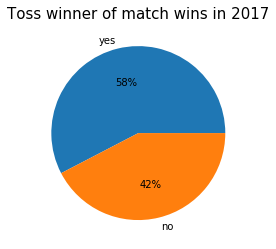

In [150]:
labels=["yes","no"]
plt.pie(silices,labels=labels,autopct='%1.0f%%')
plt.title("Toss winner of match wins in 2017",fontsize=15)

In [151]:
data_set['id'].count()

636

In [155]:
data_set["id"].idxmax()

635

In [156]:
data_set["id"].argmax()

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  """Entry point for launching an IPython kernel.


635

In [160]:
data_set.iloc[data_set['win_by_runs'].idxmax()][["win_by_runs","winner"]]

win_by_runs               146
winner         Mumbai Indians
Name: 43, dtype: object

In [162]:
data_set["season"].value_counts().idxmax()

2013

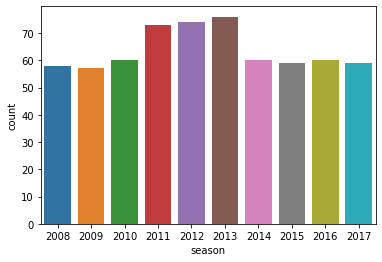

In [163]:
sns.countplot(data_set["season"])

In [166]:
df=data_set["winner"].value_counts()

[Text(0, 0, 'Mumbai Indians'),
 Text(0, 0, 'Chennai Super Kings'),
 Text(0, 0, 'Kolkata Knight Riders'),
 Text(0, 0, 'Royal Challengers Bangalore'),
 Text(0, 0, 'Kings XI Punjab'),
 Text(0, 0, 'Rajasthan Royals'),
 Text(0, 0, 'Delhi Daredevils'),
 Text(0, 0, 'Sunrisers Hyderabad'),
 Text(0, 0, 'Deccan Chargers'),
 Text(0, 0, 'Gujarat Lions'),
 Text(0, 0, 'Pune Warriors'),
 Text(0, 0, 'Rising Pune Supergiant'),
 Text(0, 0, 'Kochi Tuskers Kerala'),
 Text(0, 0, 'Rising Pune Supergiants')]

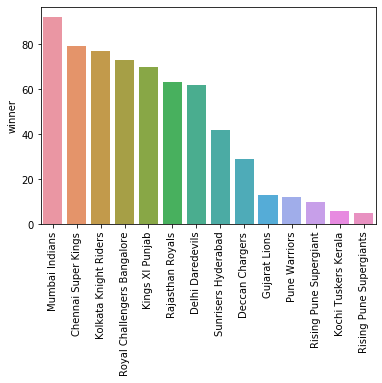

In [172]:
a=sns.barplot(df.index,df,orient='v')
a.set_xticklabels(rotation=90,labels=df.index)

In [174]:
data_set["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

In [179]:
df2=data_set["player_of_match"].value_counts()[:10]

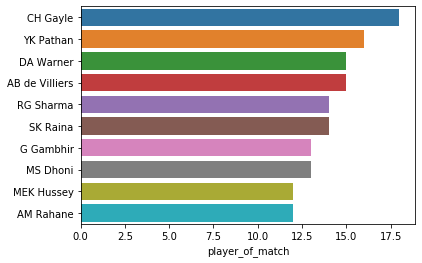

In [180]:
sns.barplot(df2,df2.index,orient="h")

In [ ]:
data